# EMLDDMM Example: MRICloud atlas data



## Introdution
We run registration between a pair of T1 MRI images from mricloud.org.
Each includes a grayscale image and a set of labels.  We first run the
registration pipeline with a config file. We then run the transformation pipeline.


In [1]:
%matplotlib notebook
import numpy as np
import torch
import matplotlib.pyplot as plt
import emlddmm
import json
import nrrd
import os

import nibabel as nib
import glob

# for debugging only
import imp
imp.reload(emlddmm)

<module 'emlddmm' from '/mnt/data/csh_data/emlddmm/emlddmm.py'>

## Registration pipeline
Here we load the atlas and target images, and run multi scale registration.
Note the inputs

atlas_name,label_name,target_name: vtk filenames for images

config_file: json filename for options

output_dir: string containing a directory for outputs


In [2]:
atlas_name = '/home/dtward/data/mricloud_atlases/Adult27-55/Adt27-55_02_Adt27-55_02_MNI.vtk'
label_name = '/home/dtward/data/mricloud_atlases/Adult27-55/Adt27-55_02_Adt27-55_02_FullLabels.vtk'
target_name = '/home/dtward/data/mricloud_atlases/Adult27-55/Adt27-55_03_Adt27-55_03_MNI.vtk'
config_file = 'config_mricloud.json'
output_dir = 'mricloud_test_outputs/'

In [3]:
with open(config_file) as f:
    config = json.load(f)
# I'm getting this for initial downsampling for preprocessing
downIs = config['downI']
downJs = config['downJ']

In [4]:
# atlas
imp.reload(emlddmm)
xI,I,title,names = emlddmm.read_data(atlas_name)
I = I.astype(float)
# normalize
I /= np.mean(np.abs(I))
dI = np.array([x[1]-x[0] for x in xI])
print(dI)
fig = emlddmm.draw(I,xI)
fig[0].suptitle('Atlas image')

Found extension .vtk
[1. 1. 1.]


<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Atlas image')

In [5]:
# initial downsampling so there isn't so much on the gpu
mindownI = np.min(np.array(downIs),0)
xI,I = emlddmm.downsample_image_domain(xI,I,mindownI)
downIs = [ list((np.array(d)/mindownI).astype(int)) for d in downIs]
dI = [x[1]-x[0] for x in xI]
print(dI)
nI = np.array(I.shape,dtype=int)
# update our config variable
config['downI'] = downIs

[1.0, 1.0, 1.0]


In [6]:
# target
imp.reload(emlddmm)
xJ,J,title,names = emlddmm.read_data(target_name)
J = J.astype(float)
J /= np.mean(np.abs(J))
dJ = np.array([x[1]-x[0] for x in xJ])
print(dJ)
J = J.astype(float)#**0.25
fig = emlddmm.draw(J,xJ)
fig[0].suptitle('Target image')
W0 = np.ones_like(J[0])

Found extension .vtk
[1. 1. 1.]


<IPython.core.display.Javascript object>

In [7]:
# initial downsampling so there isn't so much on the gpu
mindownJ = np.min(np.array(downJs),0)
xJ,J = emlddmm.downsample_image_domain(xJ,J,mindownJ)
W0 = emlddmm.downsample(W0,mindownJ)
downJs = [ list((np.array(d)/mindownJ).astype(int)) for d in downJs]
dJ = [x[1]-x[0] for x in xJ]
nJ = np.array(J.shape,dtype=int)
# update our config variable
config['downJ'] = downJs

In [8]:
imp.reload(emlddmm)
# visualize initial affine
if 'A' in config:
    A = np.array(config['A']).astype(float)
else:
    A = np.eye(4)
# this affine matrix should be 4x4, but it may be 1x4x4
if A.ndim > 2:
    A = A[0]
Ai = np.linalg.inv(A)
XJ = np.stack(np.meshgrid(*xJ,indexing='ij'),-1)
Xs = (Ai[:3,:3]@XJ[...,None])[...,0] + Ai[:3,-1]
out = emlddmm.interp(xI,I,Xs.transpose((3,0,1,2)))
fig = emlddmm.draw(out,xJ)
fig[0].suptitle('Initial transformed atlas')

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Initial transformed atlas')

Found 3 scales
dv tensor([3., 3., 3.], device='cuda:0')
a scale is 4


<IPython.core.display.Javascript object>


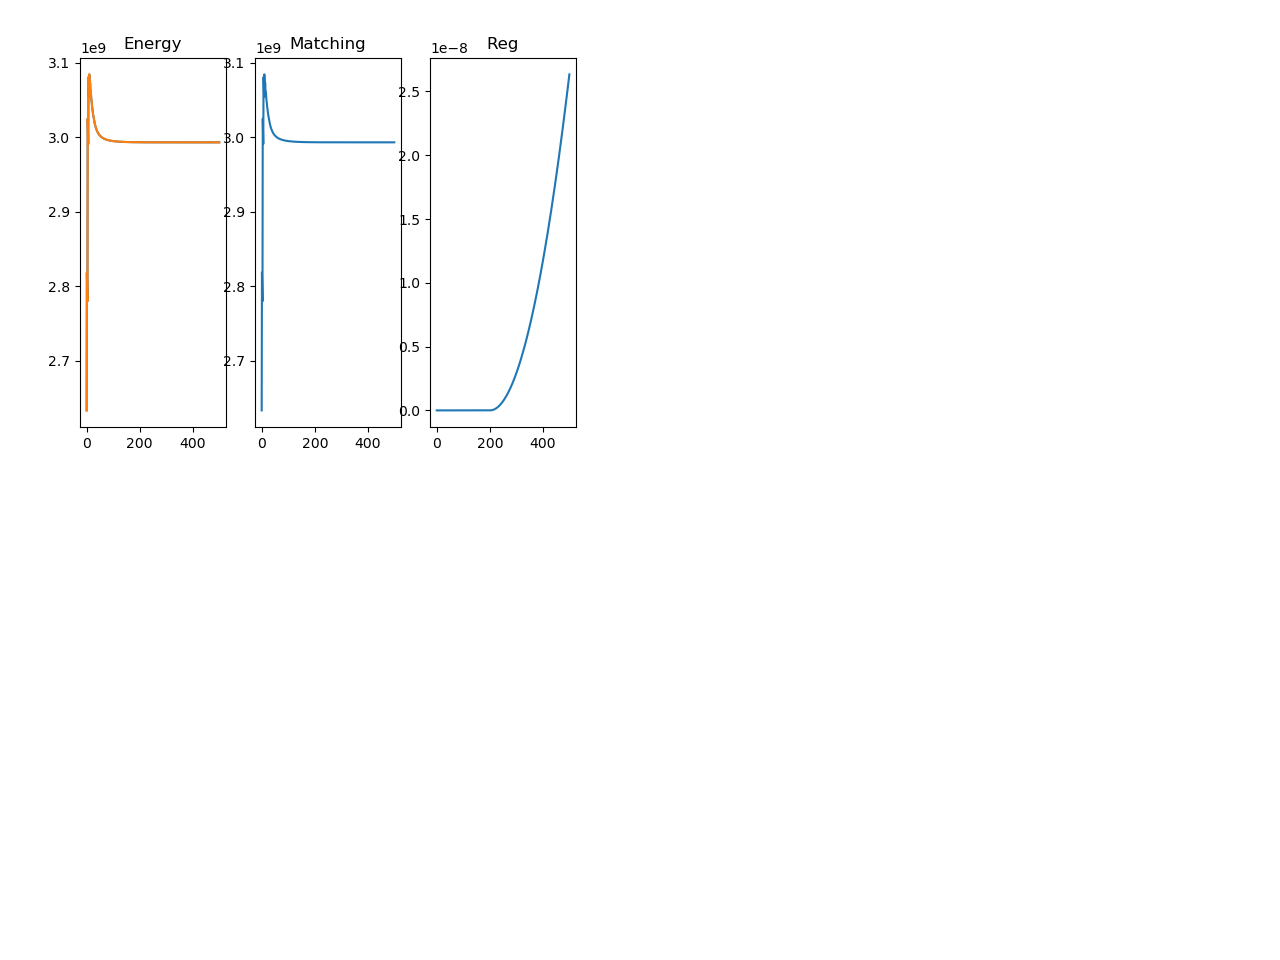

<IPython.core.display.Javascript object>


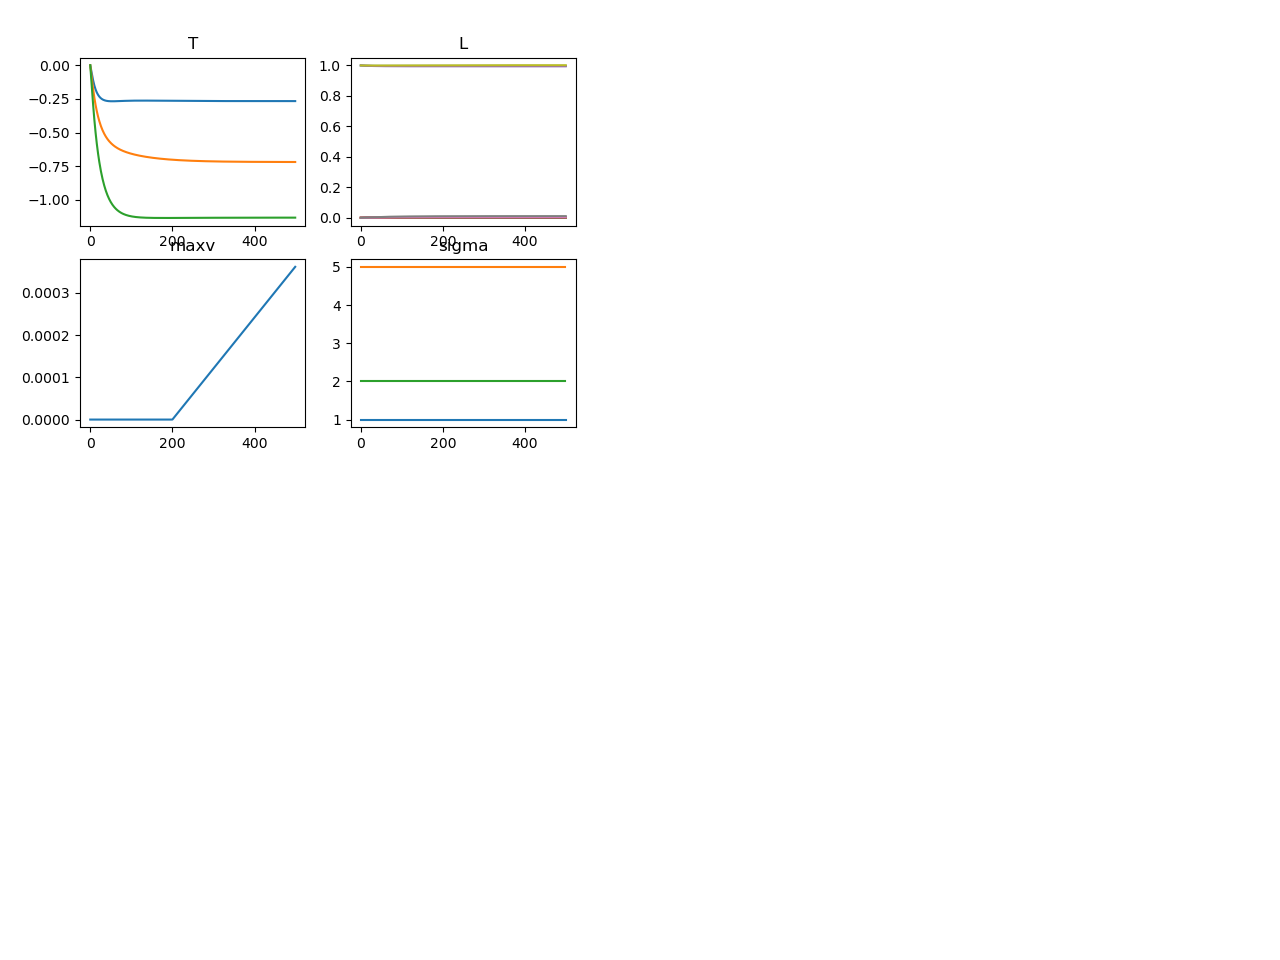

<IPython.core.display.Javascript object>


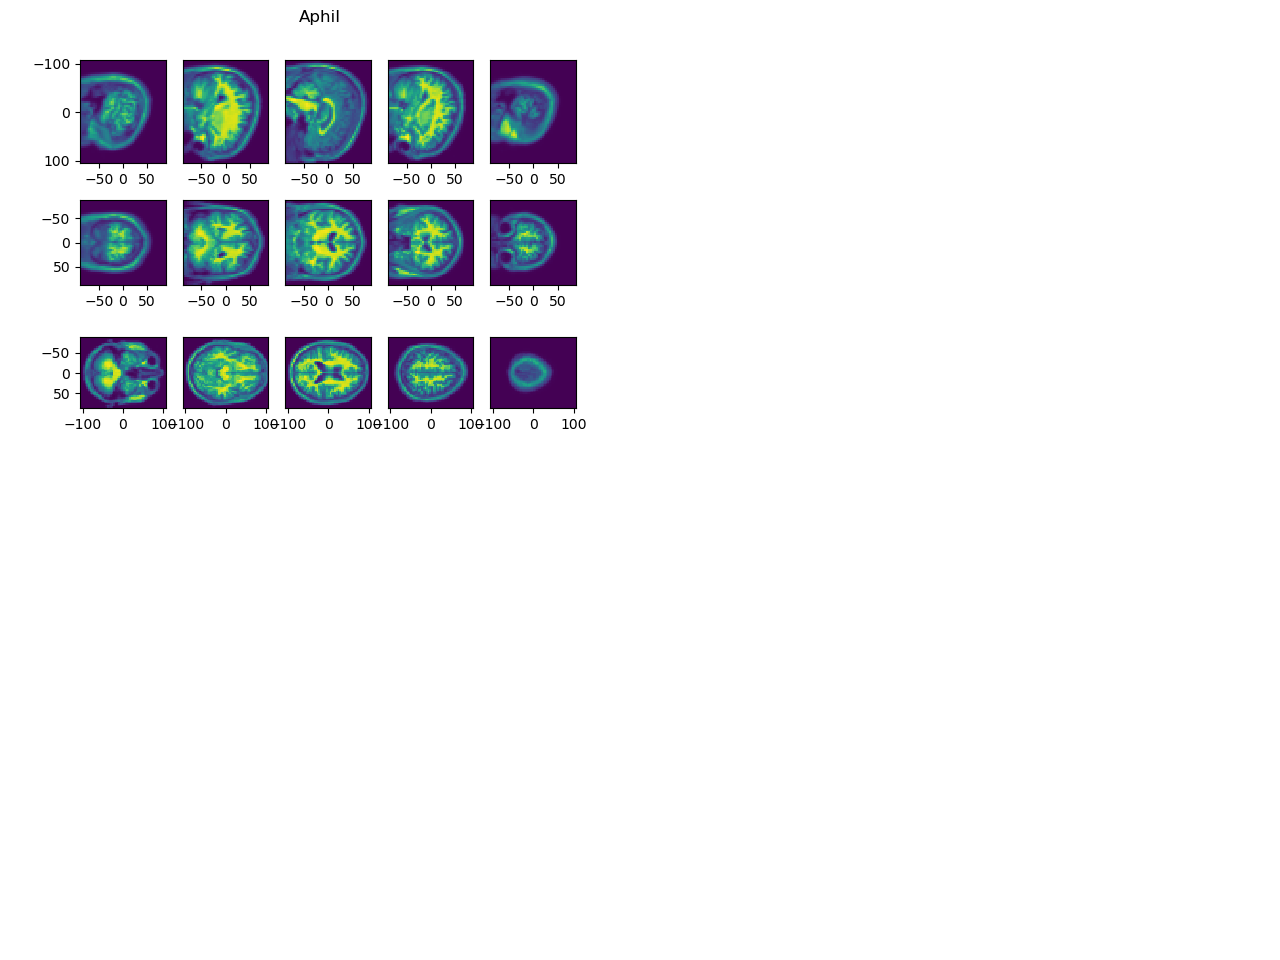

<IPython.core.display.Javascript object>


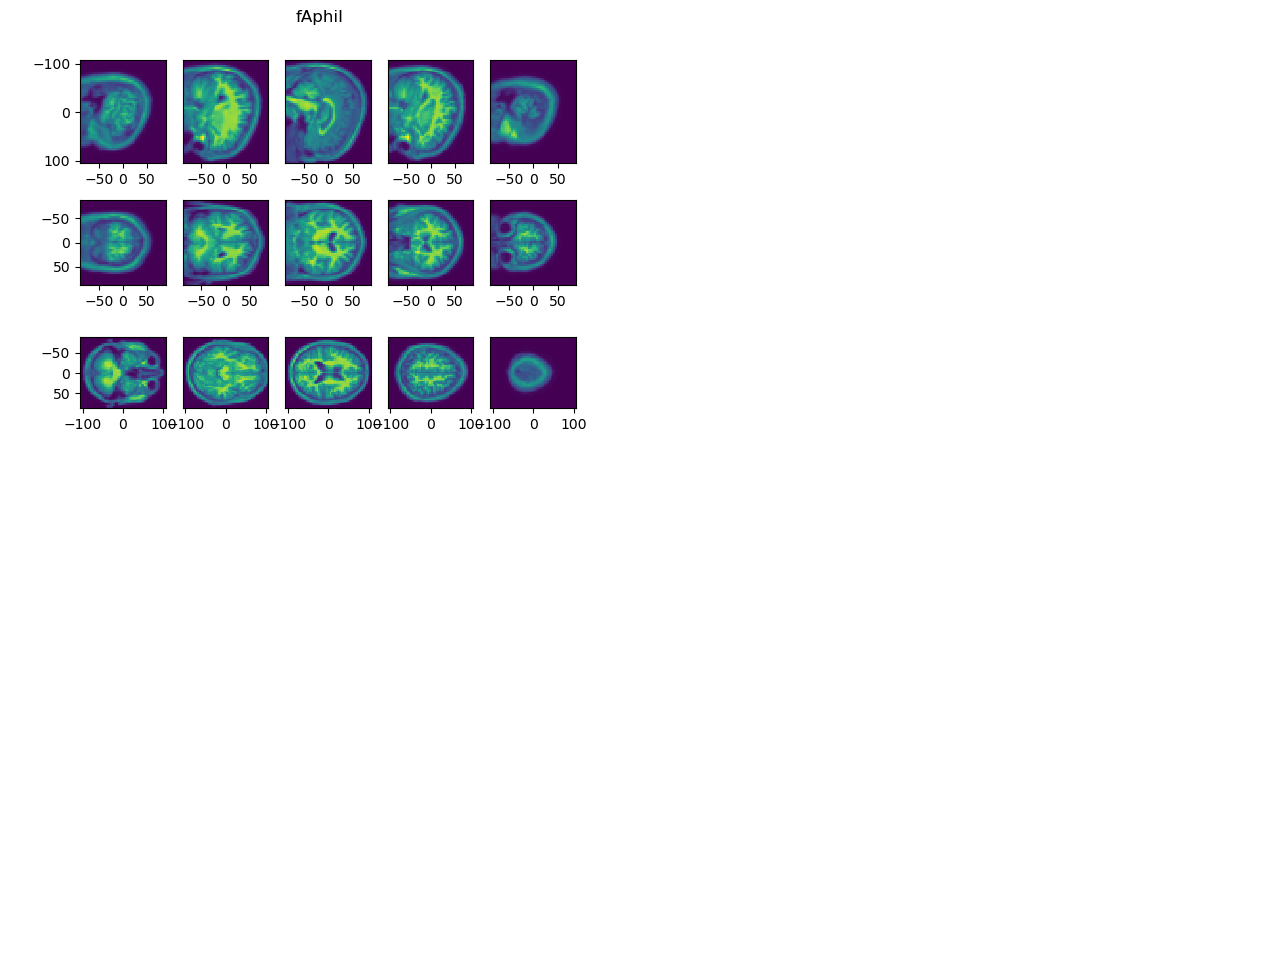

<IPython.core.display.Javascript object>


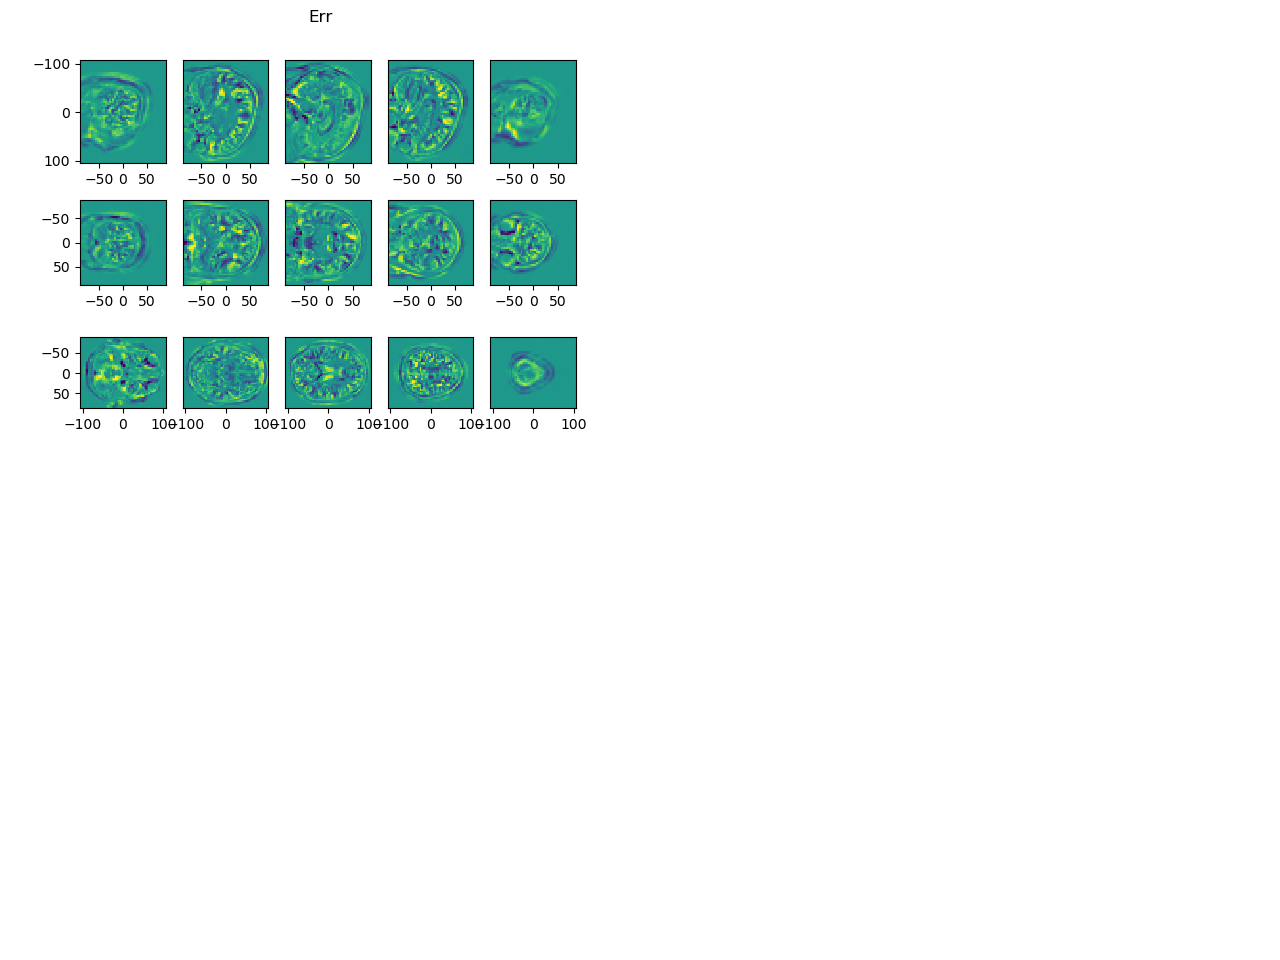

<IPython.core.display.Javascript object>


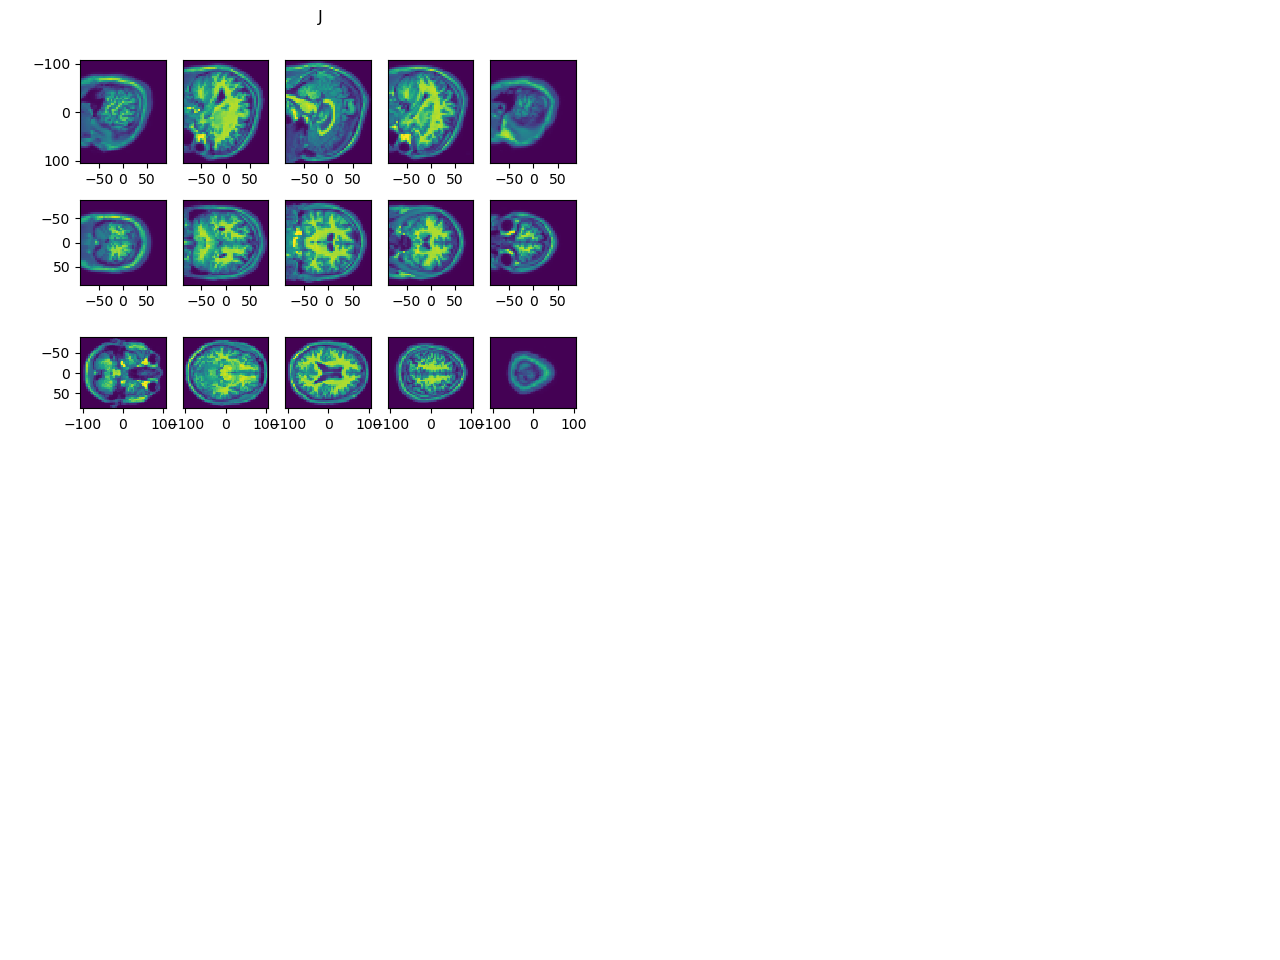

<IPython.core.display.Javascript object>


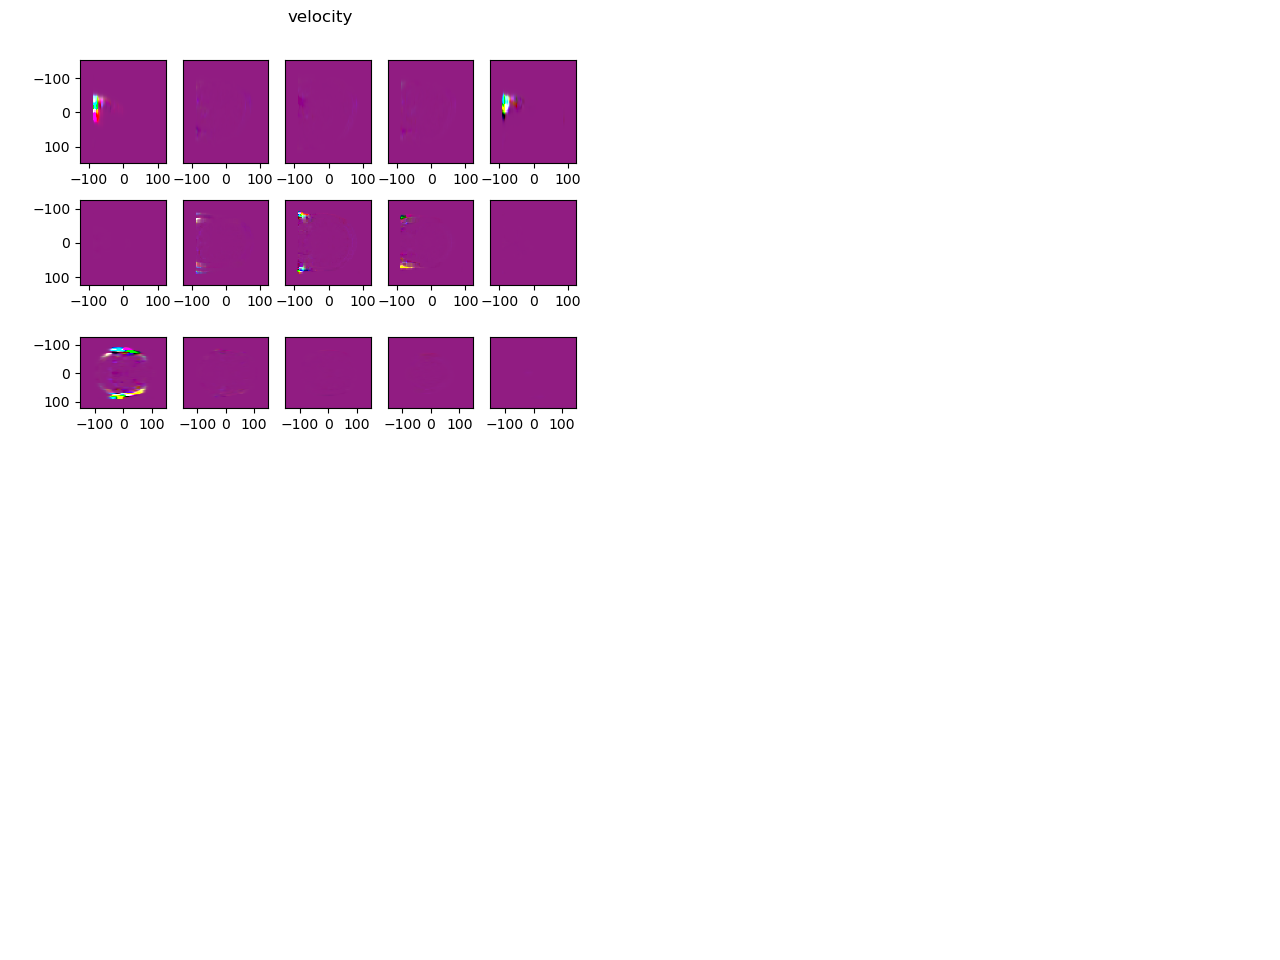

<IPython.core.display.Javascript object>


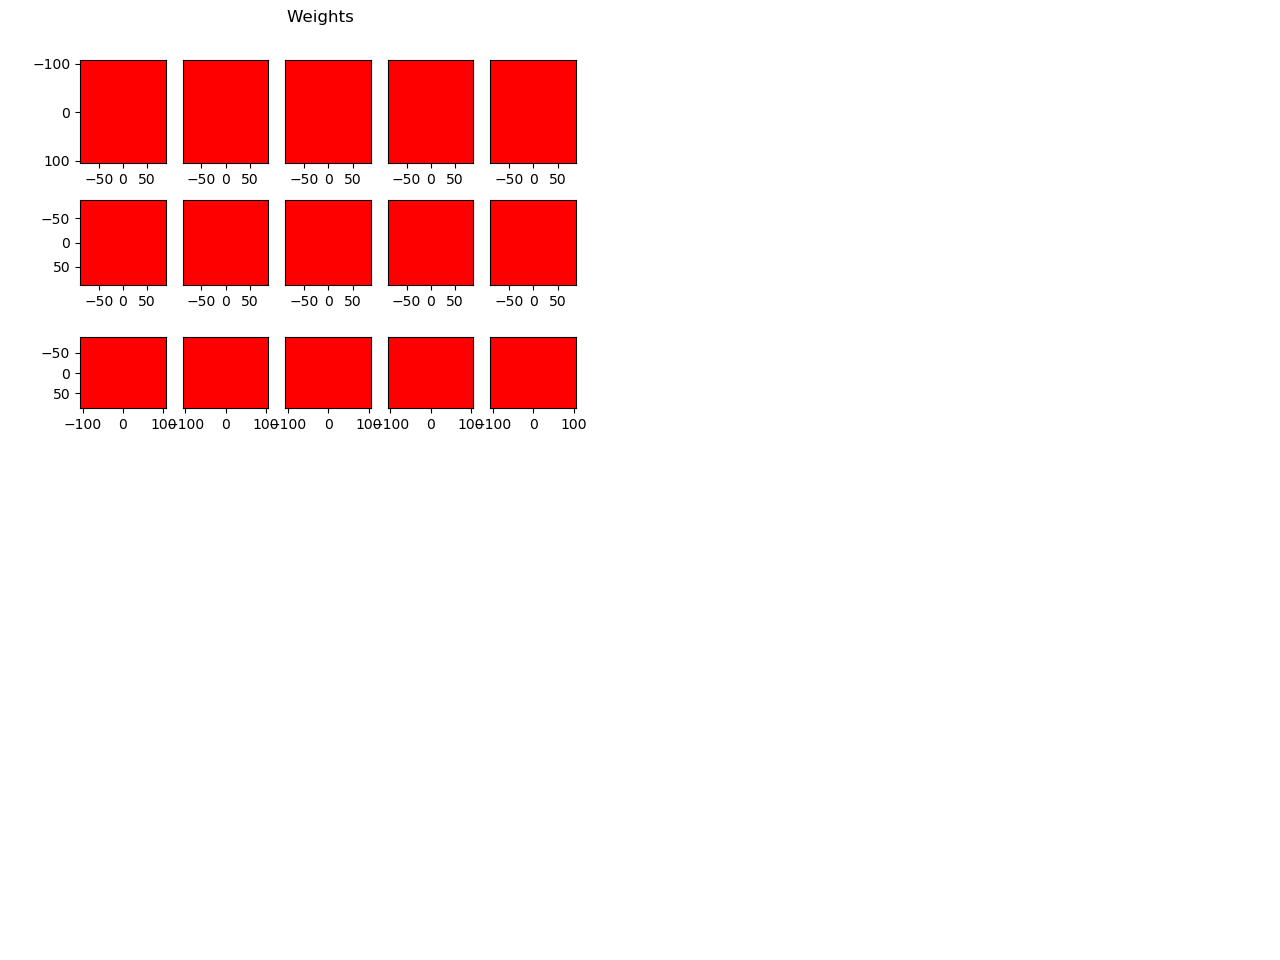

/mnt/data/csh_data/emlddmm/emlddmm.py:85: RuntimeWarning: invalid value encountered in true_divide
  J /= (vmax[:,None,None,None] - vmin[:,None,None,None])


Finished iteration 0
Finished iteration 10
Finished iteration 20
Finished iteration 30
Finished iteration 40
Finished iteration 50
Finished iteration 60
Finished iteration 70
Finished iteration 80
Finished iteration 90
Finished iteration 100
Finished iteration 110
Finished iteration 120
Finished iteration 130
Finished iteration 140
Finished iteration 150
Finished iteration 160
Finished iteration 170
Finished iteration 180
Finished iteration 190
Finished iteration 200
Finished iteration 210
Finished iteration 220
Finished iteration 230
Finished iteration 240
Finished iteration 250
Finished iteration 260
Finished iteration 270
Finished iteration 280
Finished iteration 290
Finished iteration 300
Finished iteration 310
Iteration 320, linear oscilating, reducing eA to 4.5
Finished iteration 320
Finished iteration 330
Finished iteration 340
Finished iteration 350
Finished iteration 360
Finished iteration 370
Finished iteration 380
Finished iteration 390
Finished iteration 400
Finished iterat

<IPython.core.display.Javascript object>


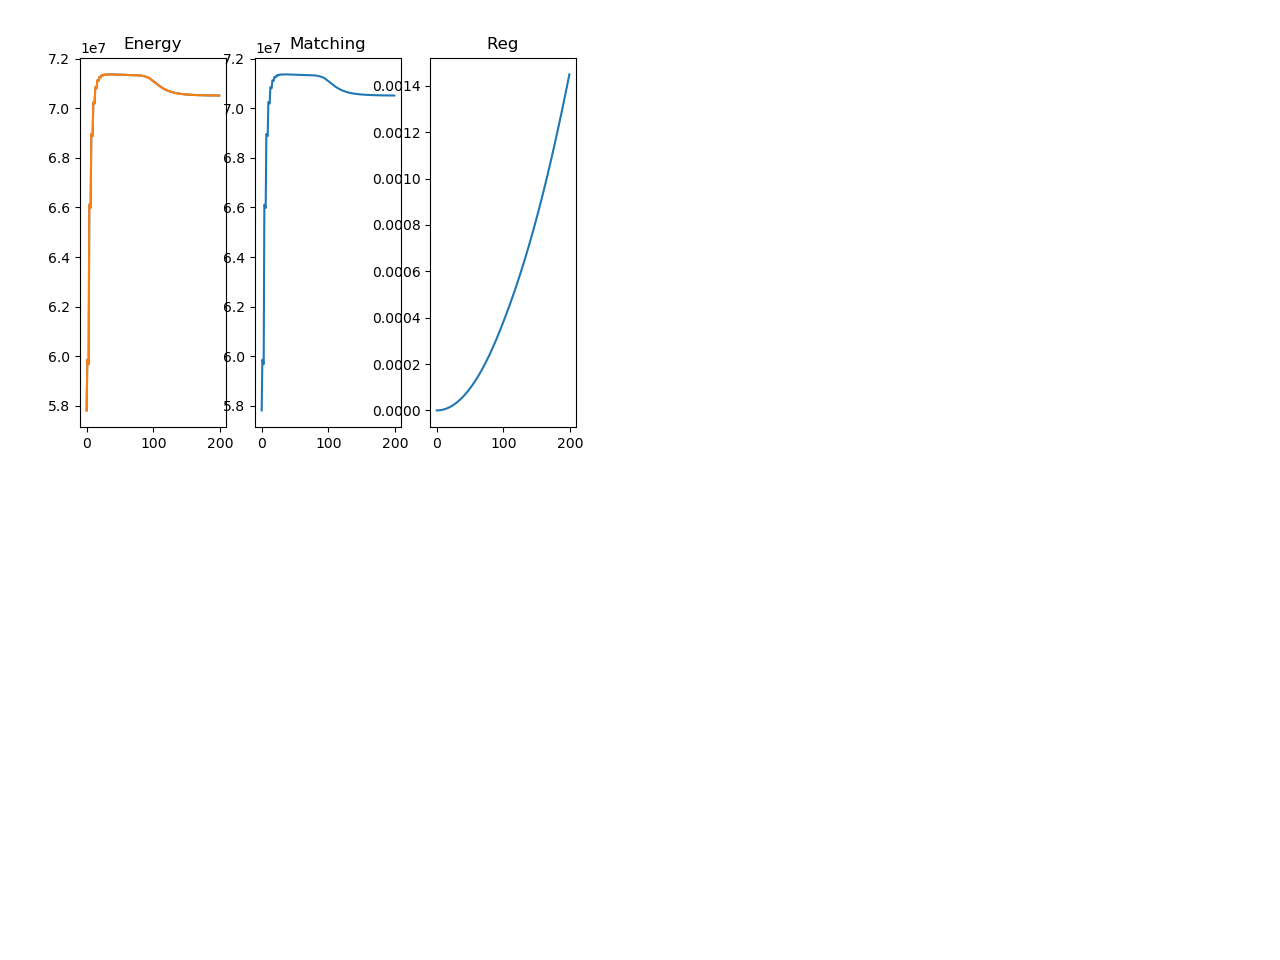

<IPython.core.display.Javascript object>


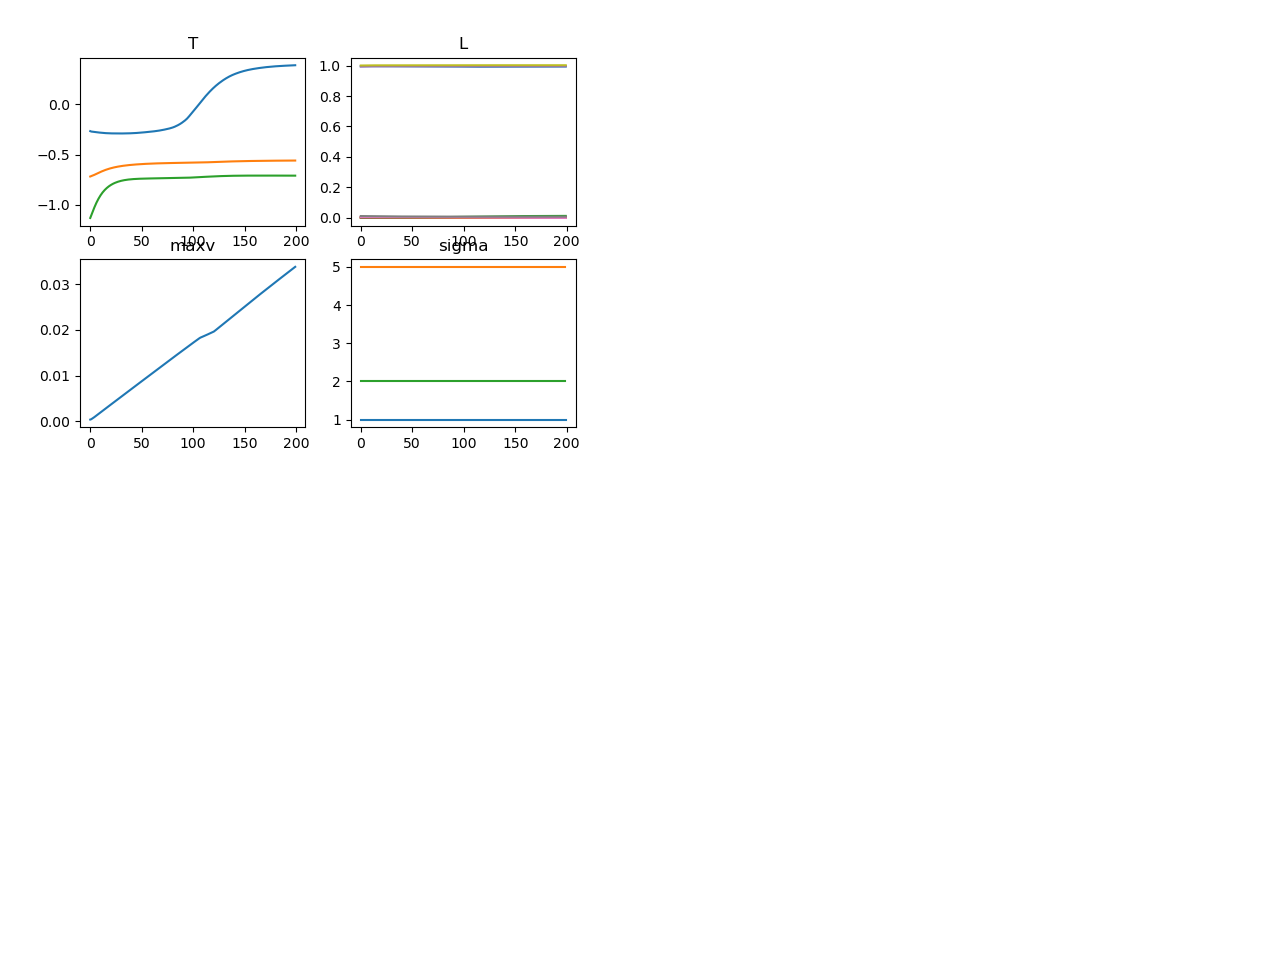

<IPython.core.display.Javascript object>


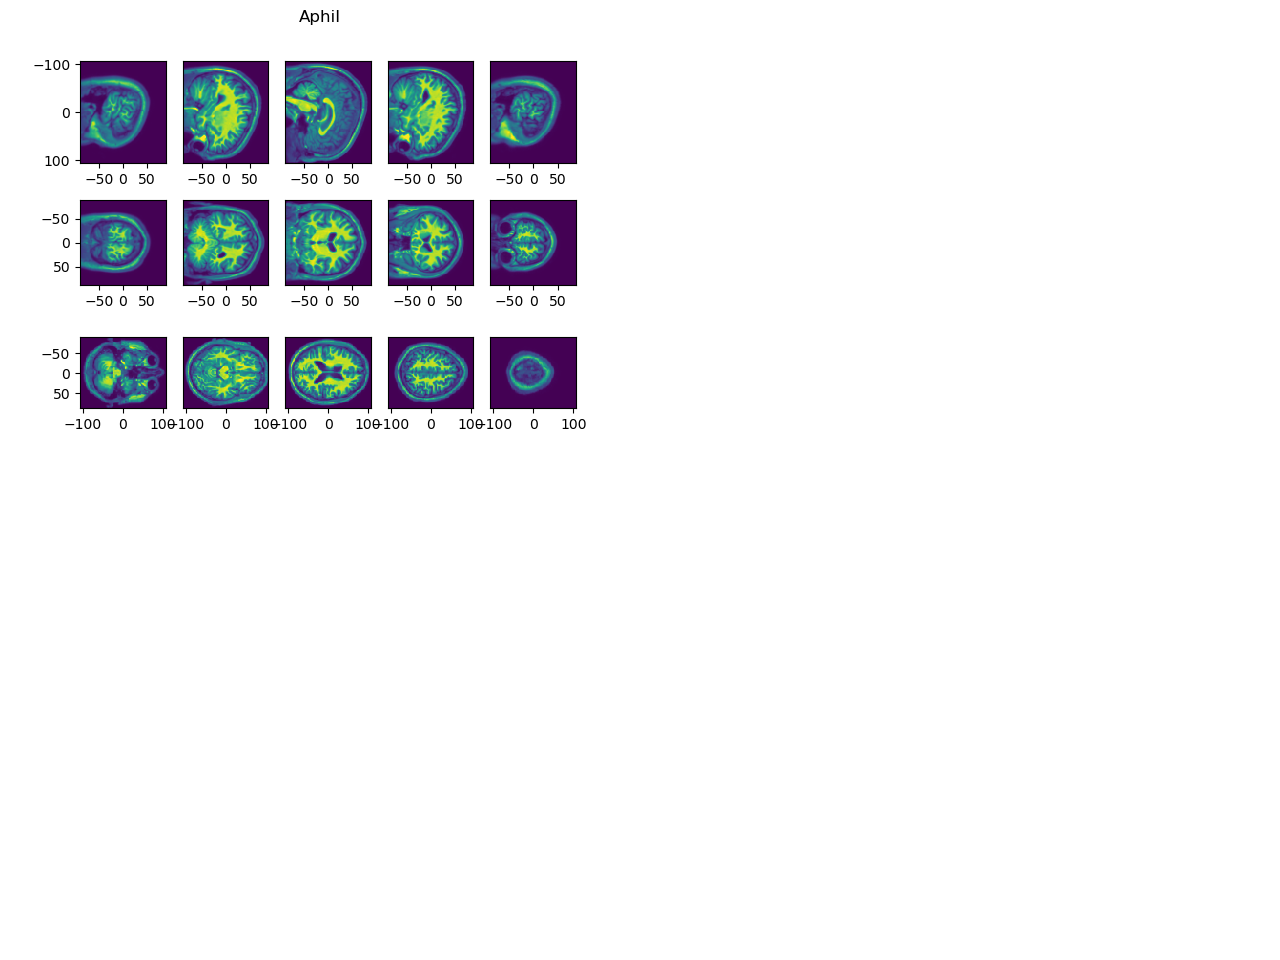

<IPython.core.display.Javascript object>


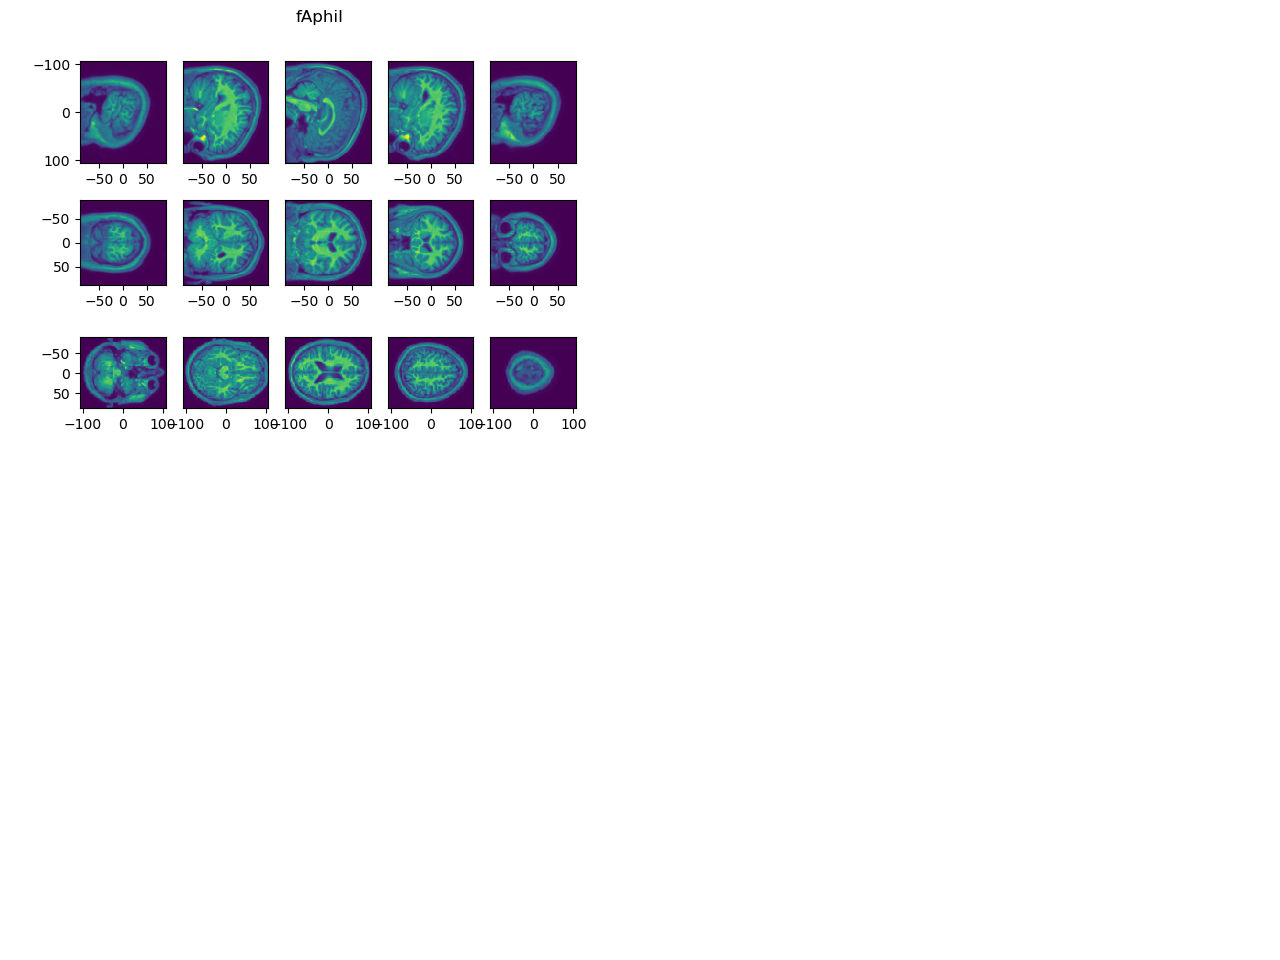

<IPython.core.display.Javascript object>


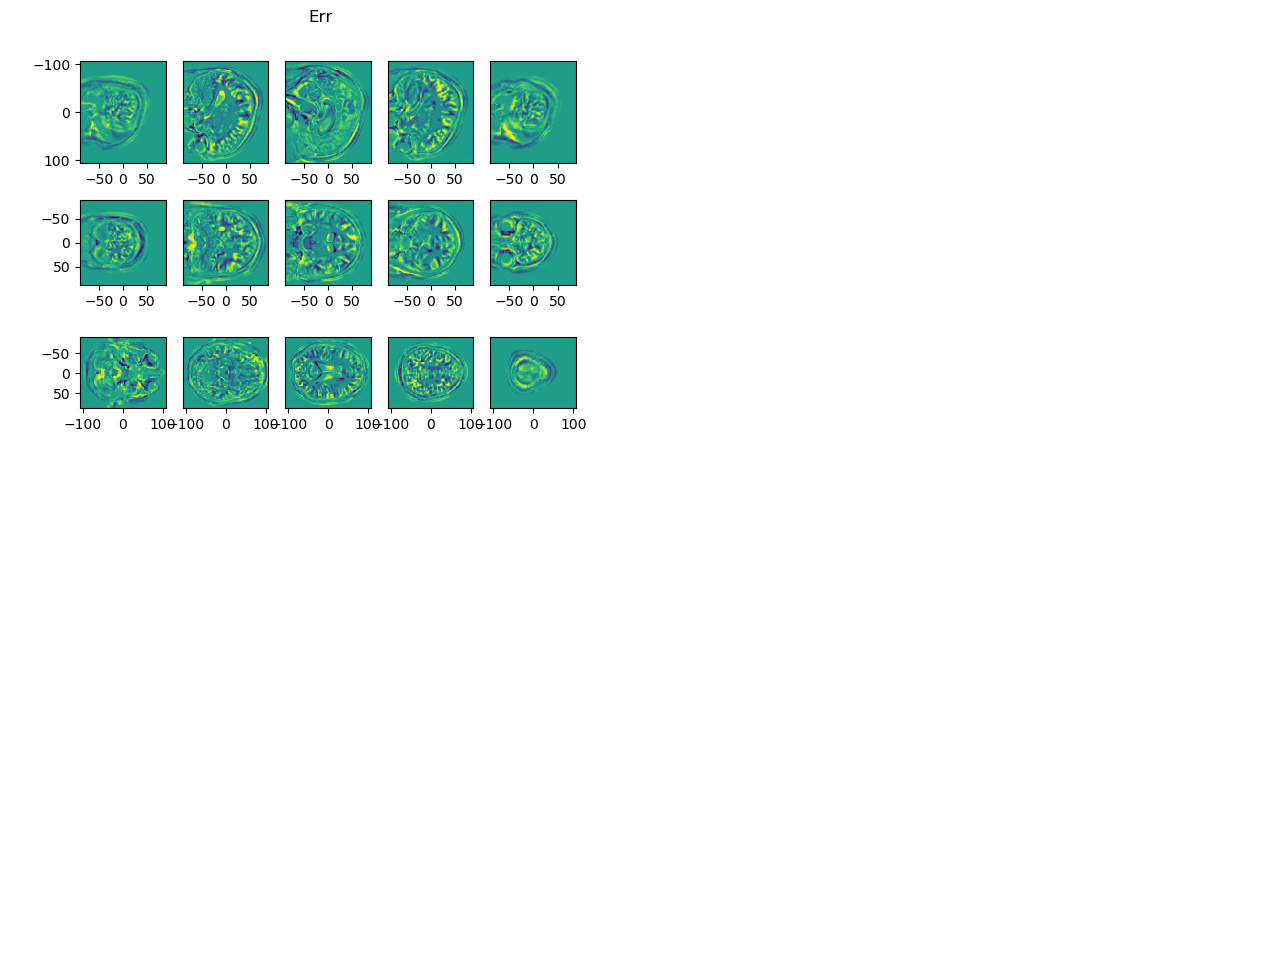

<IPython.core.display.Javascript object>


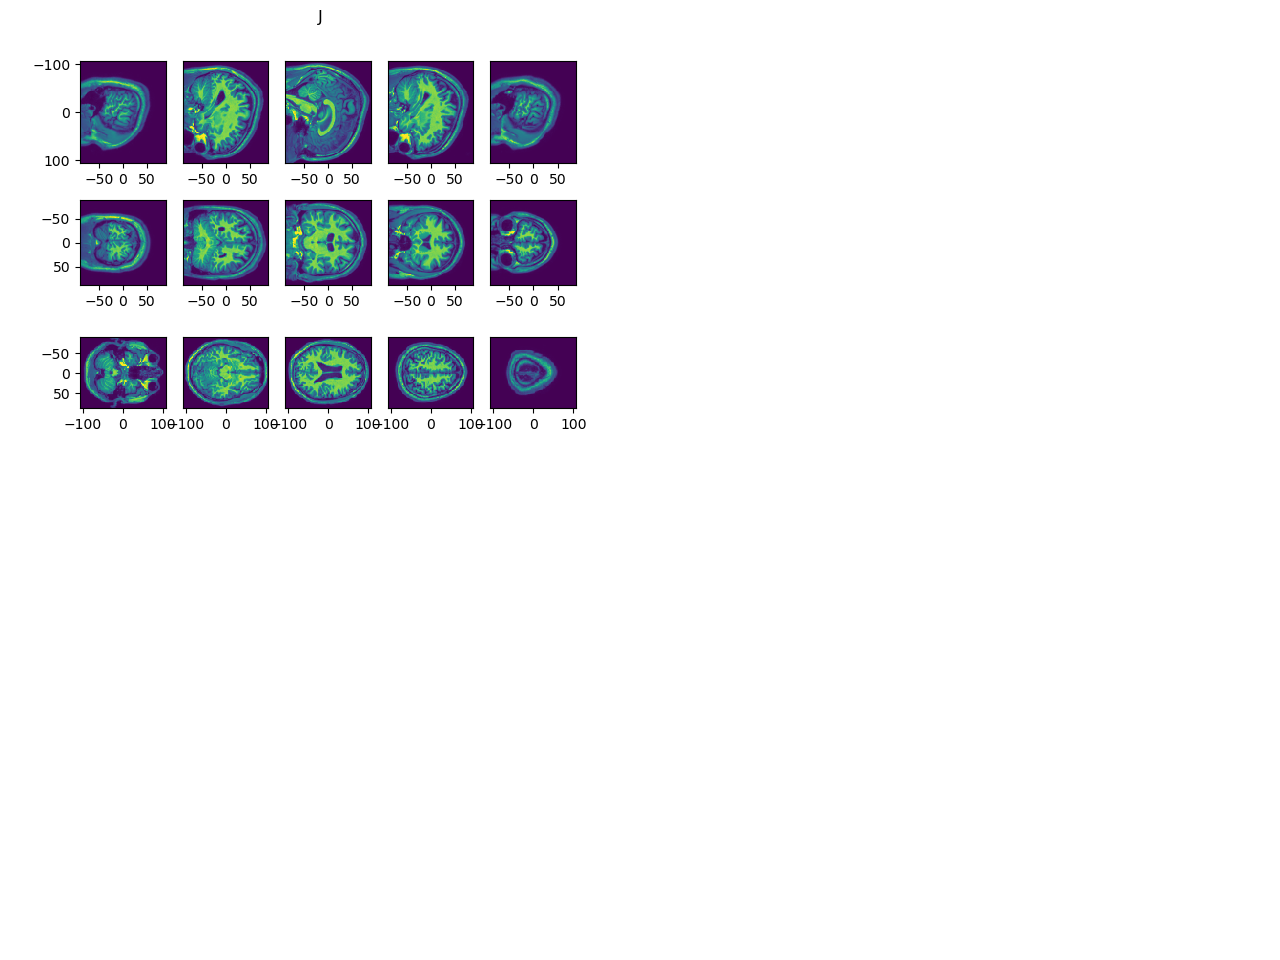

<IPython.core.display.Javascript object>


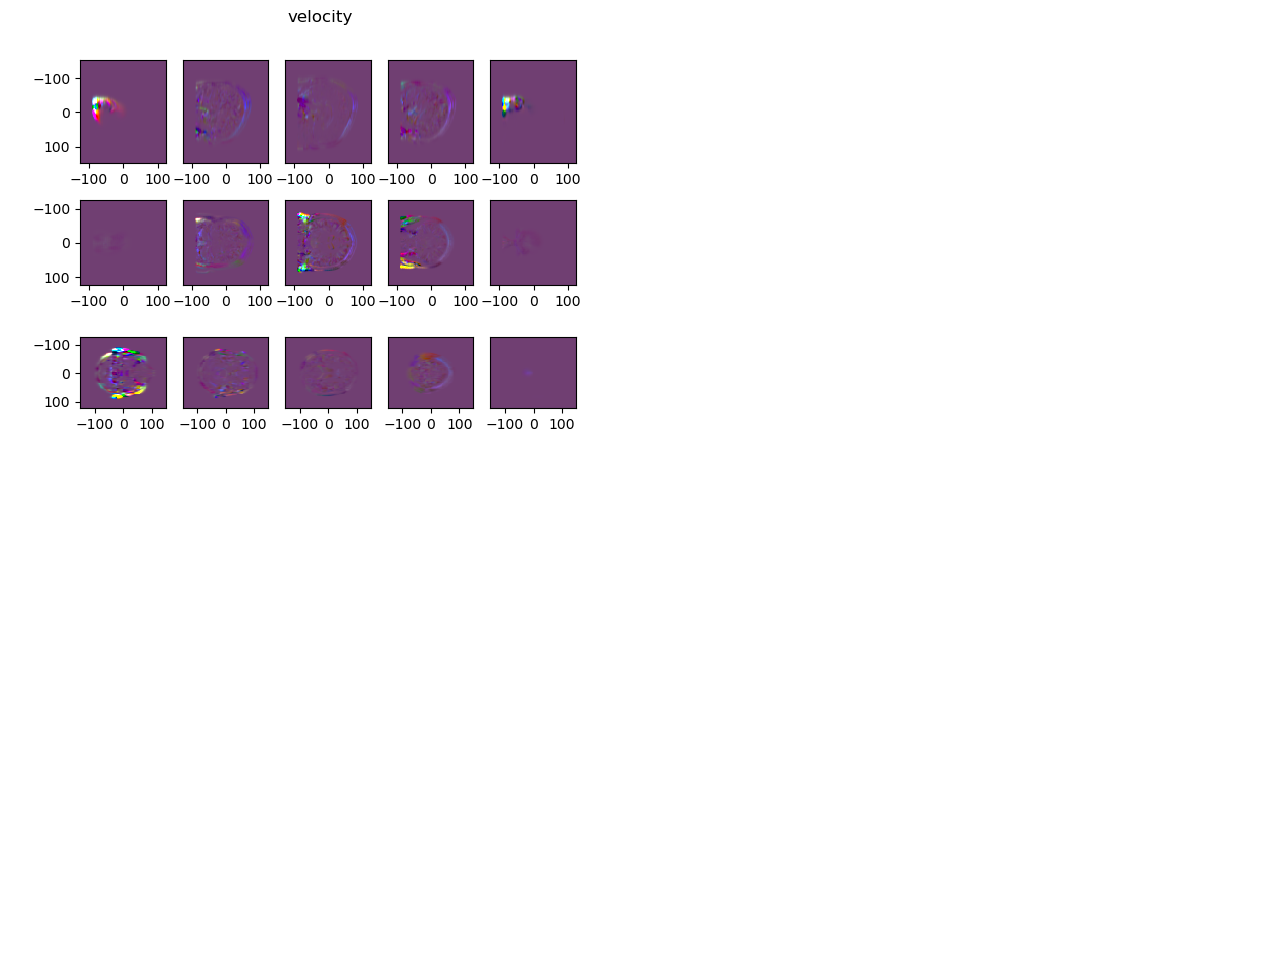

<IPython.core.display.Javascript object>


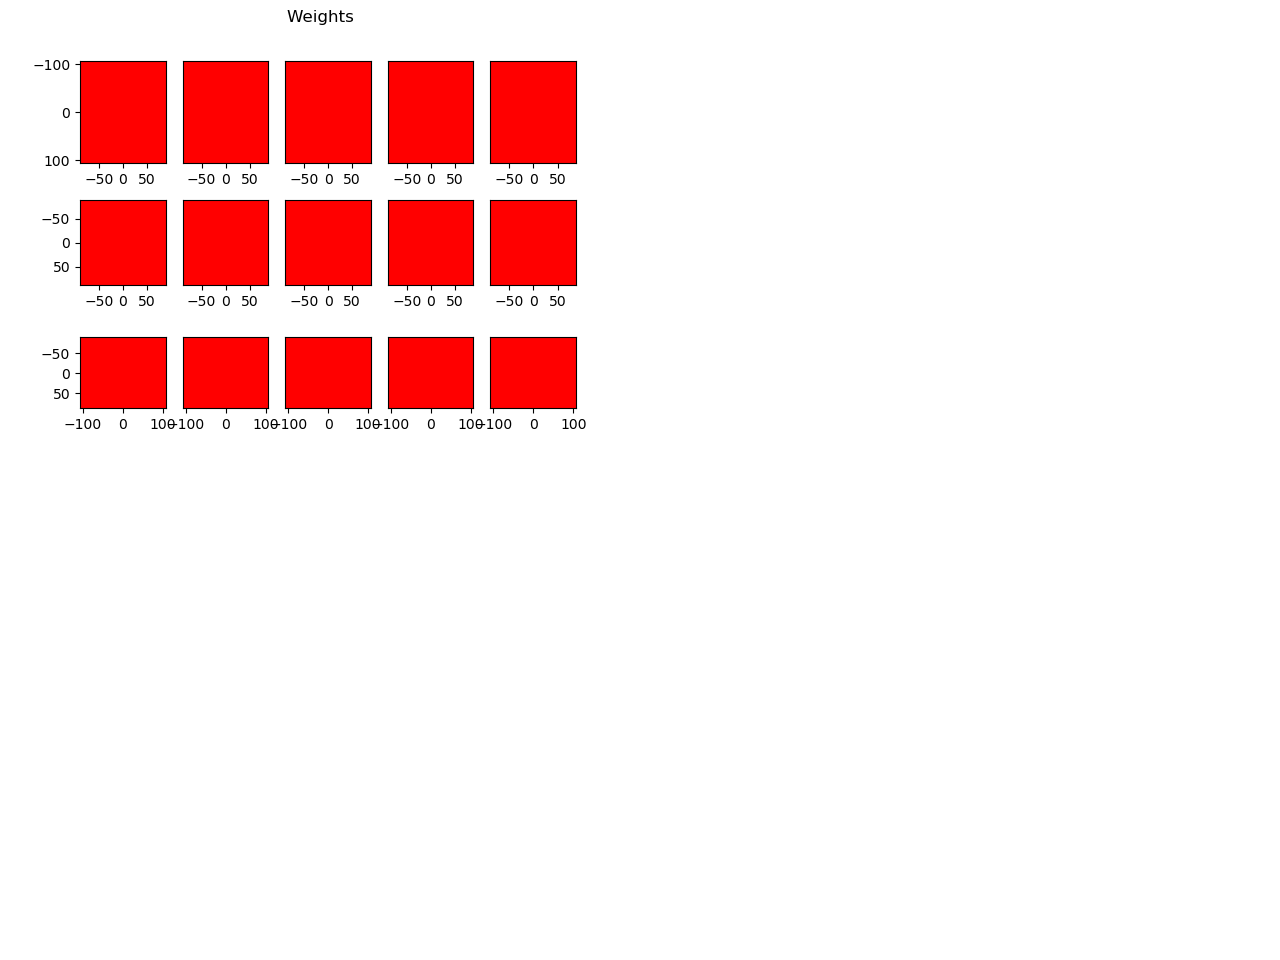

Finished iteration 0
Finished iteration 10
Finished iteration 20
Finished iteration 30
Finished iteration 40
Finished iteration 50
Finished iteration 60
Finished iteration 70
Finished iteration 80
Finished iteration 90
Finished iteration 100
Finished iteration 110
Finished iteration 120
Finished iteration 130
Finished iteration 140
Finished iteration 150
Finished iteration 160
Finished iteration 170
Finished iteration 180
Finished iteration 190
dv tensor([3., 3., 3.], device='cuda:0')
a scale is 4


<IPython.core.display.Javascript object>


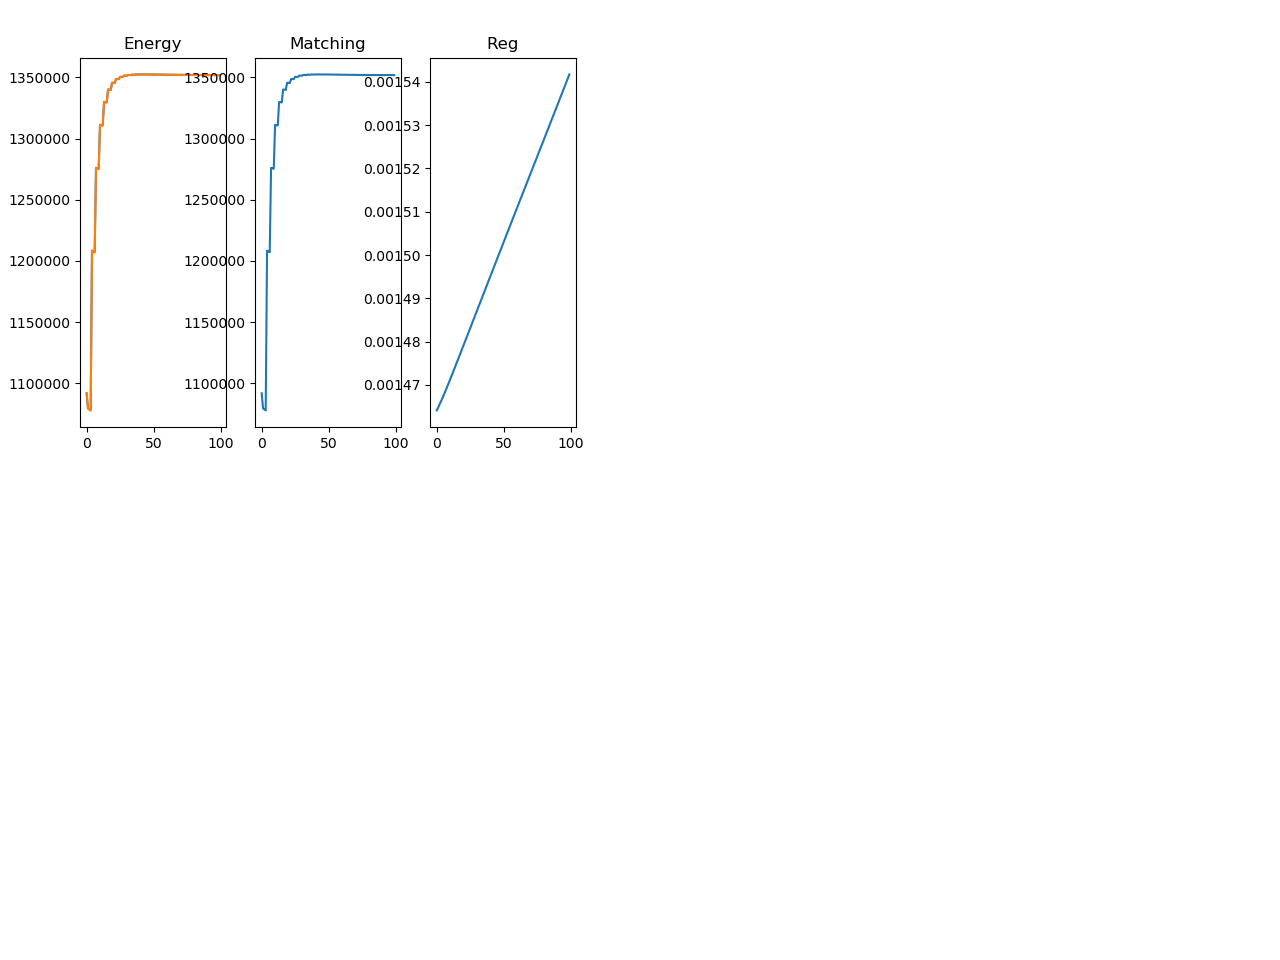

/mnt/data/csh_data/emlddmm/emlddmm.py:864: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figA,axA = plt.subplots(2,2)


<IPython.core.display.Javascript object>


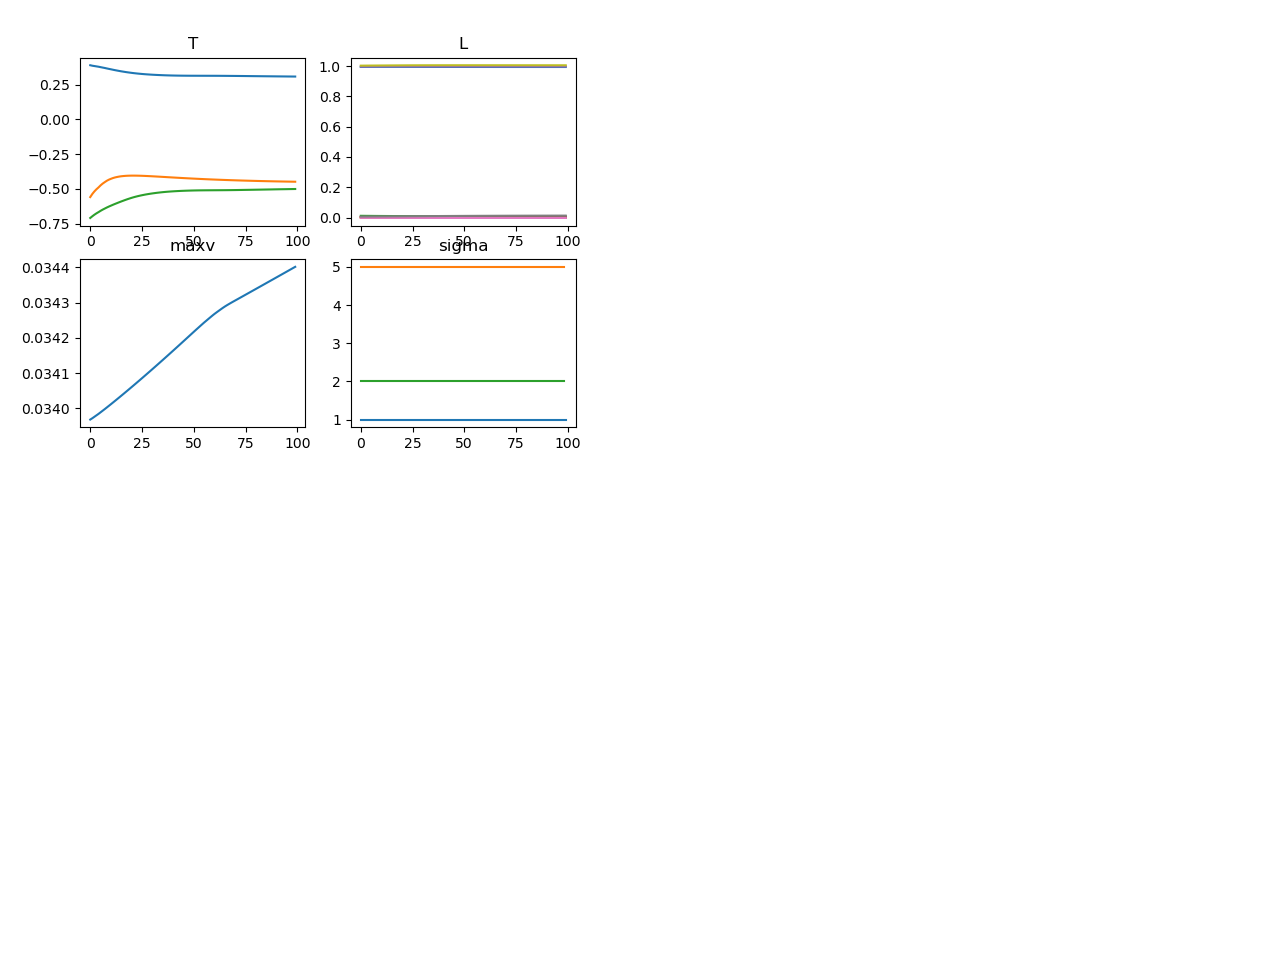

/mnt/data/csh_data/emlddmm/emlddmm.py:869: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figI = plt.figure()


<IPython.core.display.Javascript object>


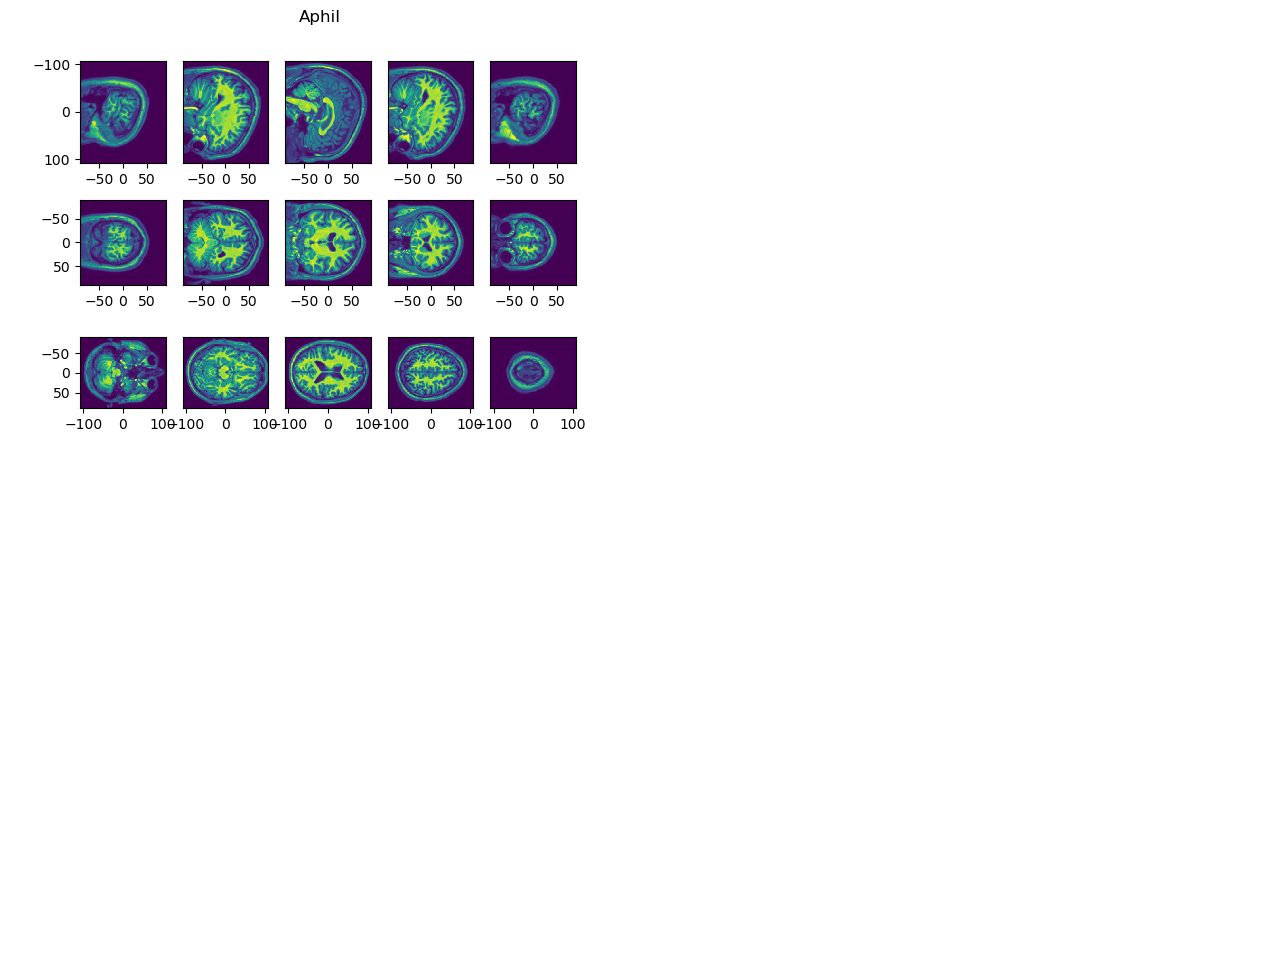

/mnt/data/csh_data/emlddmm/emlddmm.py:870: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figfI = plt.figure()


<IPython.core.display.Javascript object>


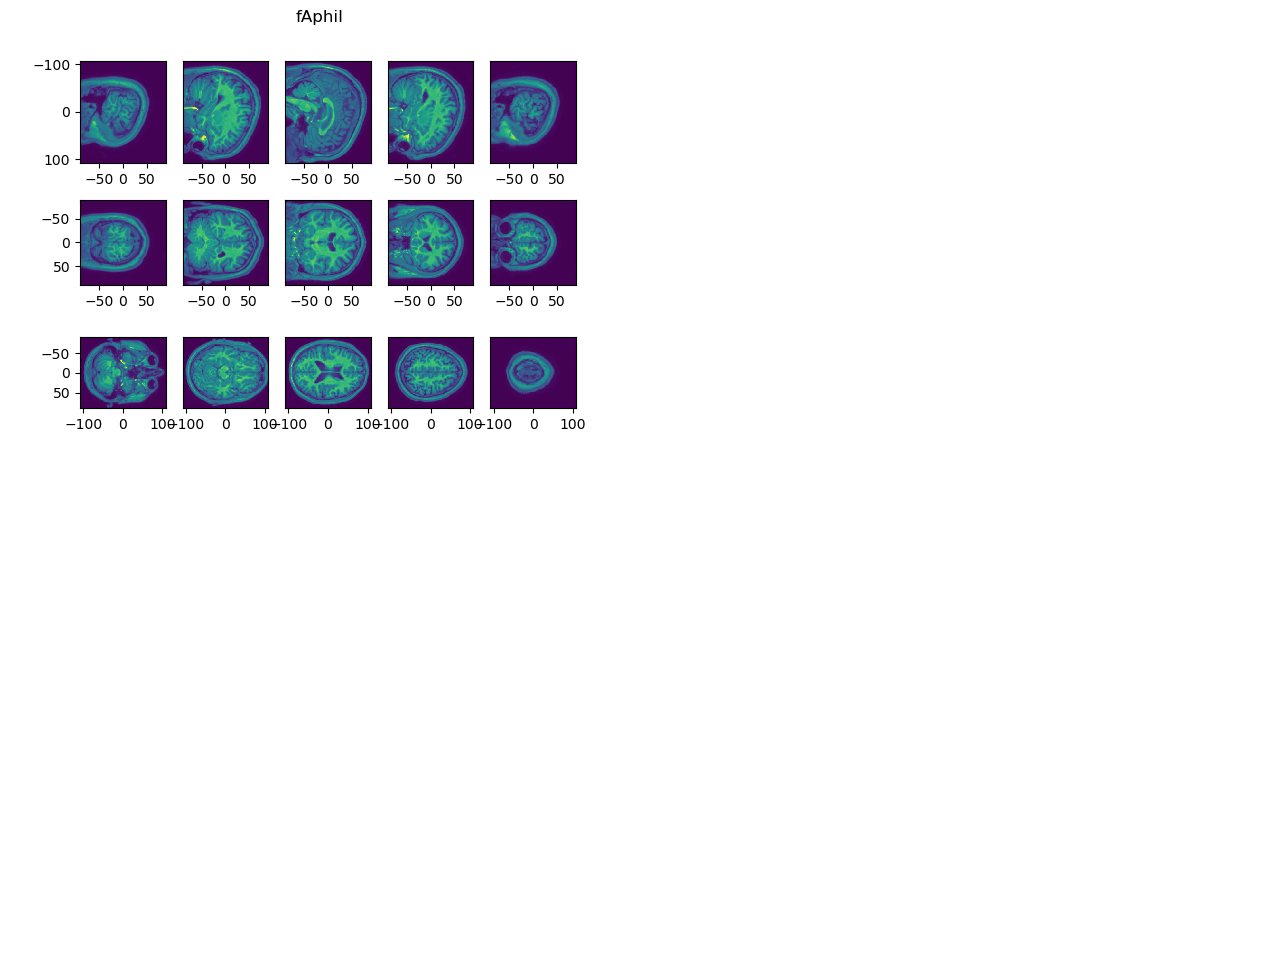

/mnt/data/csh_data/emlddmm/emlddmm.py:871: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figErr = plt.figure()


<IPython.core.display.Javascript object>


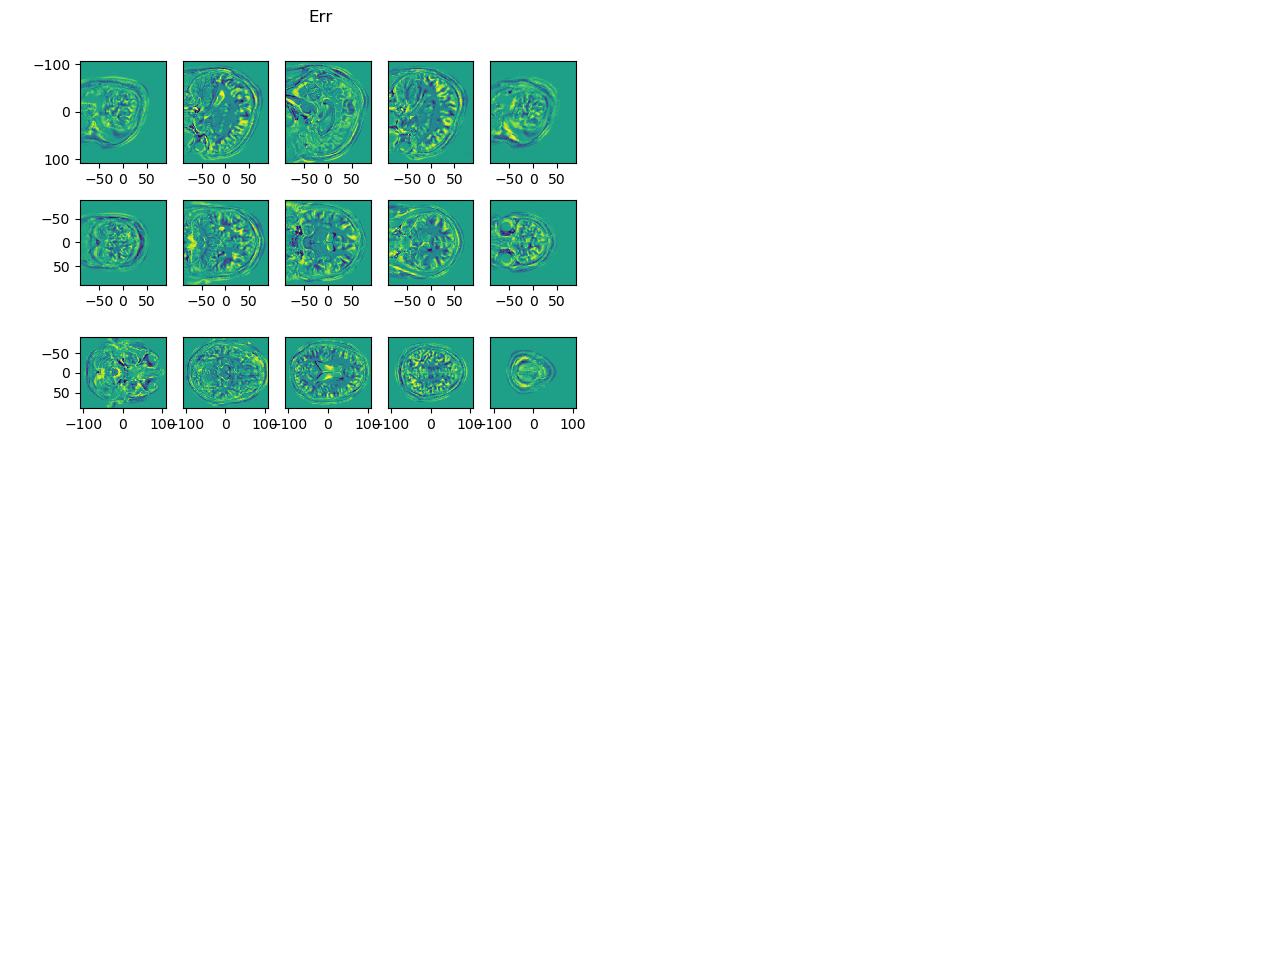

/mnt/data/csh_data/emlddmm/emlddmm.py:872: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figJ = plt.figure()


<IPython.core.display.Javascript object>


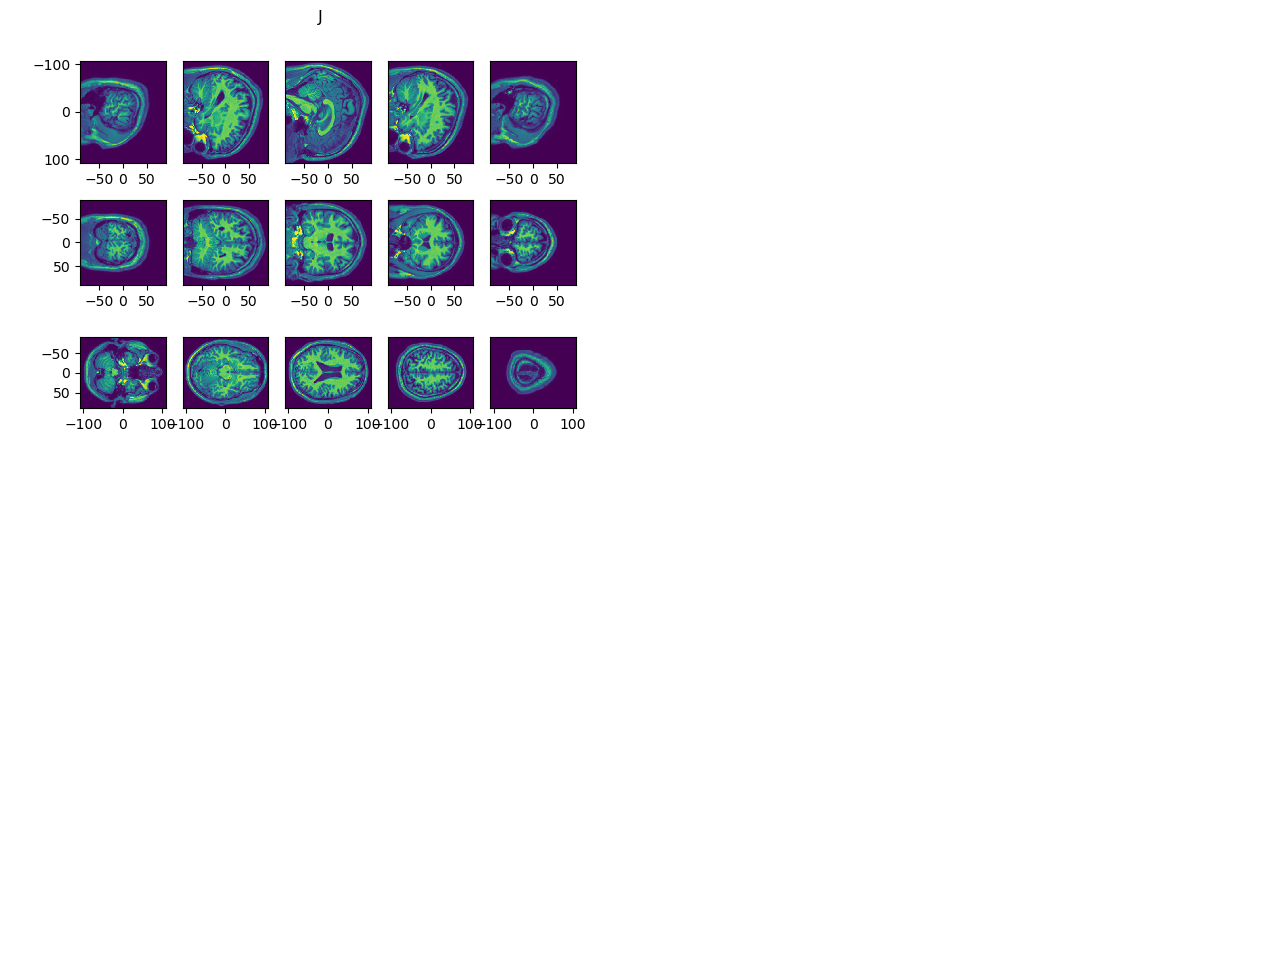

/mnt/data/csh_data/emlddmm/emlddmm.py:873: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figV = plt.figure()


<IPython.core.display.Javascript object>


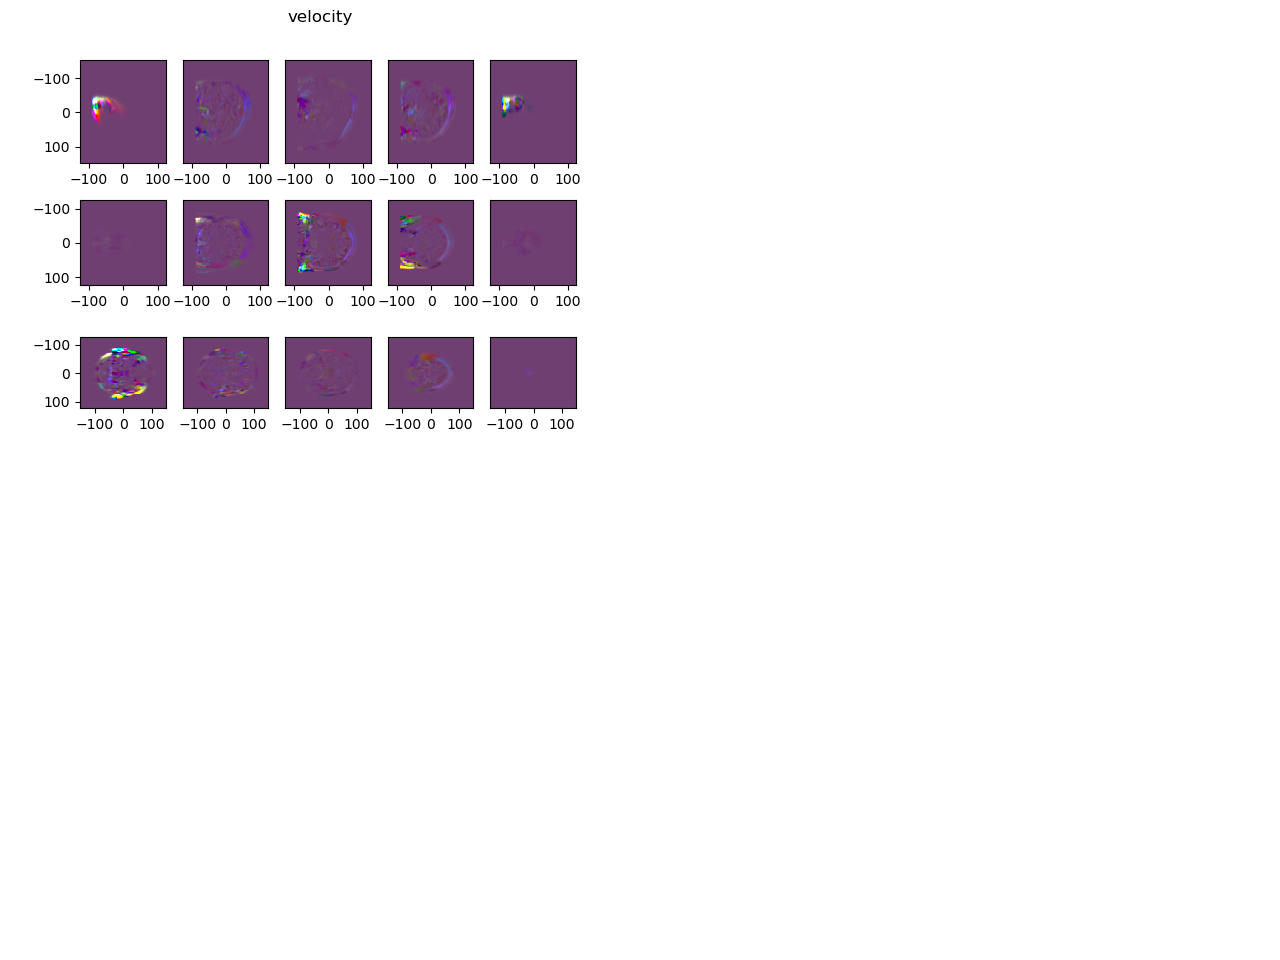

/mnt/data/csh_data/emlddmm/emlddmm.py:874: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figW = plt.figure()


<IPython.core.display.Javascript object>


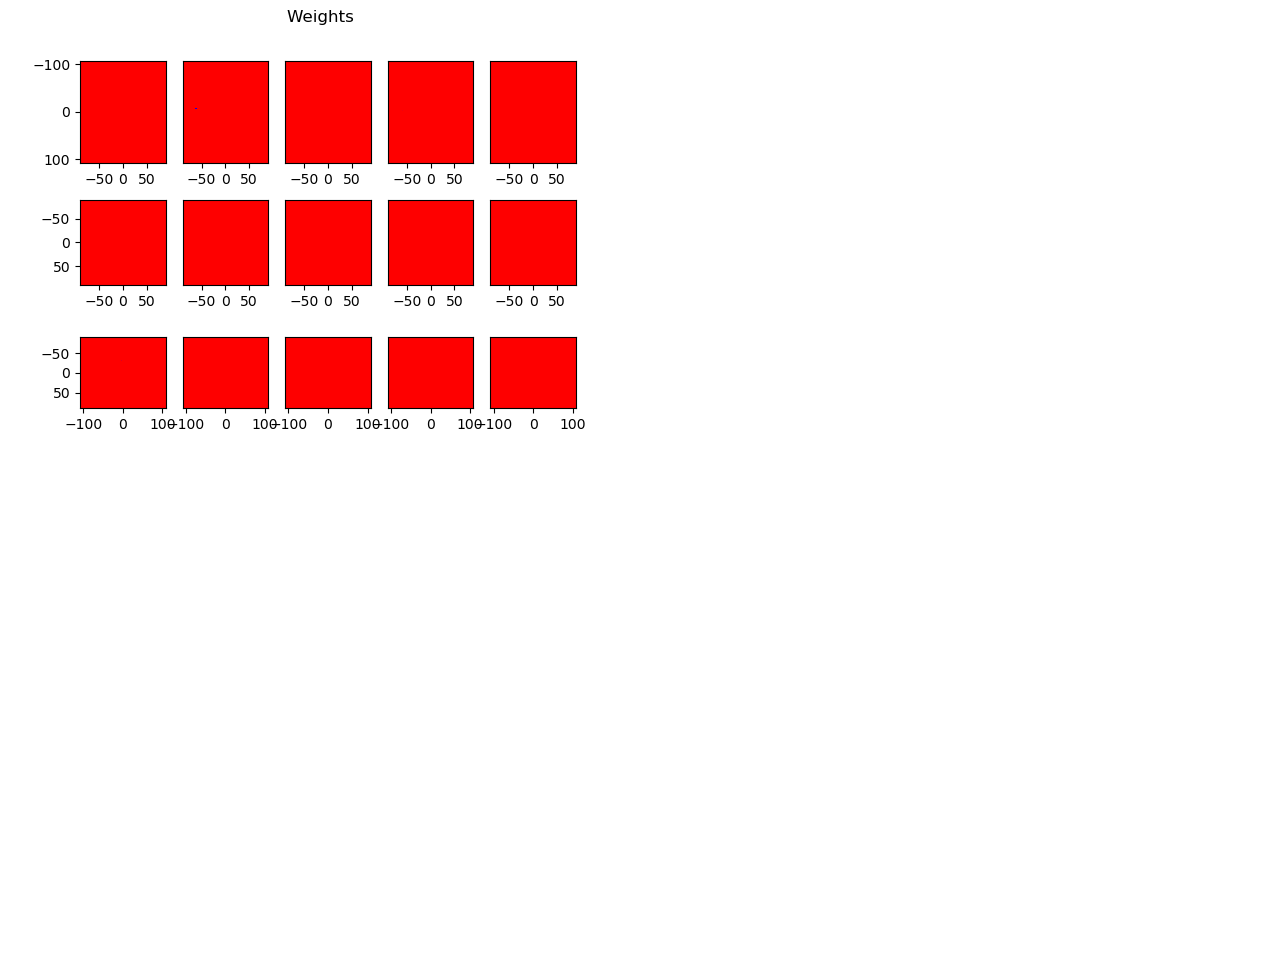

Finished iteration 0
Finished iteration 10
Finished iteration 20
Finished iteration 30
Finished iteration 40
Finished iteration 50
Finished iteration 60
Finished iteration 70
Finished iteration 80
Finished iteration 90


In [9]:
imp.reload(emlddmm)
device = 'cuda:0'
#device = 'cpu'
output = emlddmm.emlddmm_multiscale(I=I,xI=[xI],J=J,xJ=[xJ],W0=W0,device=device,**config)

In [10]:
imp.reload(emlddmm)
emlddmm.write_transform_outputs(output_dir,output[-1])

In [11]:
# get labels
xS,S,title,names = emlddmm.read_data(label_name)

Found extension .vtk


In [12]:
imp.reload(emlddmm)
emlddmm.write_qc_outputs(output_dir,output[-1],xI,I,xJ,J,xS=xS,S=S.astype(float))

cpu
output dir is mricloud_test_outputs/qc/


/mnt/data/csh_data/emlddmm/emlddmm.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>

4294967296 4294967296


<IPython.core.display.Javascript object>

4294967296 4294967296


<IPython.core.display.Javascript object>

4294967296 4294967296


<IPython.core.display.Javascript object>

4294967296 4294967296


In [13]:
# test it, forward transform is used for computing a transformed target
# that is, visualize the target deformed to match the atlas
imp.reload(emlddmm)
Xin = torch.stack(torch.meshgrid([torch.as_tensor(x) for x in xI]))
Xout = emlddmm.compose_sequence(output_dir,Xin)
Jt = emlddmm.apply_transform_float(xJ,J,Xout)

starting to compose sequence with transforms mricloud_test_outputs/


In [14]:
import matplotlib.pyplot as plt
emlddmm.draw(Jt,xI)
plt.gcf().suptitle('Transformed target')

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Transformed target')

In [15]:
# test it, backward transform is used for computing a transformed atlas
# that is, visualize the atlas deformed to match the target
Xin = torch.stack(torch.meshgrid([torch.as_tensor(x) for x in xJ]))
Xout = emlddmm.compose_sequence(output_dir,Xin,direction='b')
It = emlddmm.apply_transform_float(xI,I,Xout)
St = emlddmm.apply_transform_int(xS,S,Xout)

starting to compose sequence with transforms mricloud_test_outputs/


In [16]:
St_ = St.float()
emlddmm.draw(It,xJ)
emlddmm.draw(torch.cat((St_%7,St_%5,St_%3)),xJ)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(<Figure size 640x480 with 15 Axes>,
 [[<matplotlib.axes._subplots.AxesSubplot at 0x7f613c6be250>,
   <matplotlib.axes._subplots.AxesSubplot at 0x7f613c375710>]])

In [17]:
atlas_output_dir = os.path.join(output_dir,'to_atlas')
if not os.path.isdir(atlas_output_dir): os.mkdir(atlas_output_dir)
target_output_dir = os.path.join(output_dir,'to_target')
if not os.path.isdir(target_output_dir): os.mkdir(target_output_dir)

In [18]:
# write out
imp.reload(emlddmm)
emlddmm.write_data(os.path.join(atlas_output_dir,'target_to_atlas.vtk'),xI,Jt,'target_to_atlas')

emlddmm.write_data(os.path.join(target_output_dir,'atlas_to_target.vtk'),xI,It,'atlas_to_target')
emlddmm.write_data(os.path.join(target_output_dir,'atlas_seg_to_target.vtk'),xI,St,'atlas_seg_to_target')

Found extension .vtk
Found extension .vtk
Found extension .vtk


In [19]:
# TODO write out data at original resolution

In [20]:
with open('test','wt') as f:
    f.write()

TypeError: write() takes exactly one argument (0 given)